In [29]:
#import pandas
import pandas as pd
#read in data from "births.csv" and "score.csv" as dataframes
birthsdf=pd.read_csv("files/births.csv", sep=",")
scoredf=pd.read_csv("files/score.csv", sep=",")

In [30]:
#examine the births dataset
birthsdf.head(10)
print(birthsdf.dtypes)
birthsdf.describe()

id           int64
bweight      int64
lowbw        int64
gestwks    float64
preterm    float64
matage       int64
hyp          int64
sex          int64
dtype: object


,id,bweight,lowbw,gestwks,preterm,matage,hyp,sex
count,500.000000,500.000000,500.000000,490.000000,490.000000,500.000000,500.000000,500.000000
mean,250.500000,3136.884000,0.120000,38.721857,0.128571,34.028000,0.144000,1.472000
std,144.481833,637.451485,0.325287,2.314167,0.335067,3.897897,0.351441,0.499715
min,1.000000,628.000000,0.000000,24.690001,0.000000,23.000000,0.000000,1.000000
25%,125.750000,2862.000000,0.000000,37.939999,0.000000,31.000000,0.000000,1.000000
50%,250.500000,3188.500000,0.000000,39.125000,0.000000,34.000000,0.000000,1.000000
75%,375.250000,3551.250000,0.000000,40.090000,0.000000,37.000000,0.000000,2.000000
max,500.000000,4553.000000,1.000000,43.160000,1.000000,43.000000,1.000000,2.000000


In [31]:
#Transform categorical variables in the right format
birthsdf["lowbw"]=birthsdf["lowbw"].astype("category")
birthsdf["preterm"]=birthsdf["preterm"].astype("category")
birthsdf["hyp"]=birthsdf["hyp"].astype("category")
birthsdf["sex"]=birthsdf["sex"].astype("category")

birthsdf.head(10)



,id,bweight,lowbw,gestwks,preterm,matage,hyp,sex
0,1,2974,0,38.520000,0.0,34,0,2
1,2,3270,0,NaN,NaN,30,0,1
2,3,2620,0,38.150002,0.0,35,0,2
3,4,3751,0,39.799999,0.0,31,0,1
4,5,3200,0,38.889999,0.0,33,1,1
5,6,3673,0,40.970001,0.0,33,0,2
6,7,3628,0,42.139999,0.0,29,0,2
7,8,3773,0,40.209999,0.0,37,0,1
8,9,3960,0,42.029999,0.0,36,0,2
9,10,3405,0,39.330002,0.0,39,0,1


In [32]:
#new dataframe with any rows with missing data excluded
birthsdf_clean=birthsdf.dropna()
scoredf_clean=scoredf.dropna()



In [33]:
#merge two dataframes, keeping matching and unmatching rows
merged_df=pd.merge(birthsdf_clean, scoredf_clean, on="id", how="outer")
#this creates a new datafarme merging by id number. 



In [34]:

columns_to_check=["bweight","lowbw","gestwks","preterm","matage","hyp","sex","score"]
missing_count = merged_df[columns_to_check].isna().sum()
print(missing_count)

#There are rows without scores (65), but there are no rows that have score values but do not have the other info. I.e. all the ids in the score dataset are in the births dataset.


bweight     0
lowbw       0
gestwks     0
preterm     0
matage      0
hyp         0
sex         0
score      65
dtype: int64


In [35]:
#Reorder the merged dataset by variable score
sorted_merged_df=merged_df.sort_values(by="score", ascending=True).copy()



In [36]:
import numpy as np
#Drops rows with missing values
cleaned_merged_df=merged_df.dropna().copy()
correlation_coef_bweight_vs_gestwks=np.corrcoef(cleaned_merged_df["bweight"], cleaned_merged_df["gestwks"])[0,1]
correlation_coef_matage_vs_bweight=np.corrcoef(cleaned_merged_df["matage"], cleaned_merged_df["bweight"])[0,1]
correlation_coef_bweight_vs_score=np.corrcoef(cleaned_merged_df["bweight"], cleaned_merged_df["score"])[0,1]
correlation_coef_score_vs_gestwks=np.corrcoef(cleaned_merged_df["score"], cleaned_merged_df["gestwks"])[0,1]
correlation_coef_matage_vs_score=np.corrcoef(cleaned_merged_df["matage"], cleaned_merged_df["score"])[0,1]
correlation_coef_matage_vs_gestwks=np.corrcoef(cleaned_merged_df["matage"], cleaned_merged_df["gestwks"])[0,1]
print(f"The correlation coefficient between birthweight and gestational weeks is {round(correlation_coef_bweight_vs_gestwks,4)}.")
print(f"The correlation coefficient between maternal age and birthweight is {round(correlation_coef_matage_vs_bweight,4)}.")
print(f"The correlation coefficient between birthweight and score is {round(correlation_coef_bweight_vs_score,4)}.")
print(f"The correlation coefficient between gestational weeks and score is {round(correlation_coef_score_vs_gestwks,4)}.")
print(f"The correlation coefficient between maternal age and score is {round(correlation_coef_matage_vs_score,4)}.")
print(f"The correlation coefficient between maternal age and gestational weeks is {round(correlation_coef_matage_vs_gestwks,4)}.")



The correlation coefficient between birthweight and gestational weeks is 0.6995.
The correlation coefficient between maternal age and birthweight is -0.0097.
The correlation coefficient between birthweight and score is 0.3365.
The correlation coefficient between gestational weeks and score is 0.406.
The correlation coefficient between maternal age and score is 0.0041.
The correlation coefficient between maternal age and gestational weeks is 0.0155.


In [37]:
#Examine the two way distribution of the categorical variables in tabular form.

sex_hyp_group=pd.crosstab(cleaned_merged_df["sex"], cleaned_merged_df["hyp"])
print('Sex and Hypertension distribution:\n', sex_hyp_group, '\n')
sex_preterm_group=pd.crosstab(cleaned_merged_df["sex"], cleaned_merged_df["preterm"])
print('Sex and Preterm distribution:\n', sex_preterm_group, '\n')
preterm_hyp_group=pd.crosstab(cleaned_merged_df["preterm"], cleaned_merged_df["hyp"])
print('Preterm and Hypertension distribution:\n', preterm_hyp_group, '\n')
lowbw_sex_group=pd.crosstab(cleaned_merged_df["sex"], cleaned_merged_df["lowbw"])
print('Low birthweight and Sex distribution:\n', lowbw_sex_group, '\n')
lowbw_hyp_group=pd.crosstab(cleaned_merged_df["lowbw"], cleaned_merged_df["hyp"])
print('Lowbirthweight and Hypertension distribution:\n', lowbw_hyp_group, '\n')
lowbw_preterm_group=pd.crosstab(cleaned_merged_df["lowbw"], cleaned_merged_df["preterm"])
print('Low birghweight and Preterm distribution:\n', lowbw_preterm_group, '\n')

Sex and Hypertension distribution:
 hyp    0   1
sex         
1    191  36
2    178  20 

Sex and Preterm distribution:
 preterm  0.0  1.0
sex              
1        202   25
2        174   24 

Preterm and Hypertension distribution:
 hyp        0   1
preterm         
0.0      332  44
1.0       37  12 

Low birthweight and Sex distribution:
 lowbw    0   1
sex           
1      204  23
2      171  27 

Lowbirthweight and Hypertension distribution:
 hyp      0   1
lowbw         
0      333  42
1       36  14 

Low birghweight and Preterm distribution:
 preterm  0.0  1.0
lowbw            
0        356   19
1         20   30 



In [38]:
#create a new variable highscore that identifies a score higher than 150
condition=[cleaned_merged_df["score"]>150, cleaned_merged_df["score"]<=150]
choices=["1", "0"]
cleaned_merged_df["highscore"]= np.select(condition, choices, default="0")
#cleaned_merged_df["highscore"]=cleaned_merged_df[cleaned_merged_df["score"]150]

print(cleaned_merged_df)

      id  bweight lowbw    gestwks preterm  matage hyp sex       score  \
0      1     2974     0  38.520000     0.0      34   0   2  182.279785   
1      3     2620     0  38.150002     0.0      35   0   2  174.372831   
2      4     3751     0  39.799999     0.0      31   0   1  188.701484   
4      6     3673     0  40.970001     0.0      33   0   2  180.351763   
5      7     3628     0  42.139999     0.0      29   0   2  176.544494   
..   ...      ...   ...        ...     ...     ...  ..  ..         ...   
485  496     2852     0  38.450001     0.0      28   0   2  161.526635   
486  497     3187     0  38.029999     0.0      38   1   1  140.624805   
487  498     3054     0  38.500000     0.0      26   0   2  170.273407   
488  499     3178     0  39.919998     0.0      31   0   2  172.190403   
489  500     2918     0  37.970001     0.0      31   0   1  164.519514   

    highscore  
0           1  
1           1  
2           1  
4           1  
5           1  
..        ...  

In [39]:
#create an aggregated version of the dataset that reports average birthweight by high score and sex

aggregated_df=cleaned_merged_df.groupby(["highscore","sex"])["bweight"].mean()
print(aggregated_df)

highscore  sex
0          1      2859.514286
           2      2472.500000
1          1      3308.812500
           2      3090.427778
Name: bweight, dtype: float64


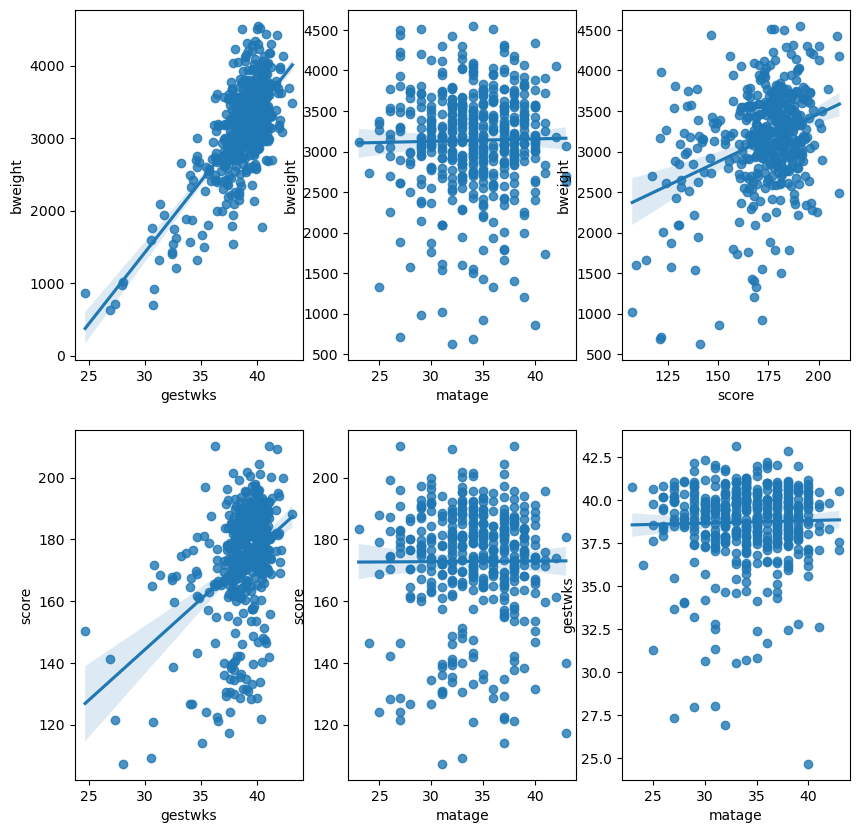

In [40]:
#using seaborn and regression plots to examine relationship between continuous variables
import matplotlib.pyplot as plt
import seaborn as sns
fig, axs=plt.subplots(2, 3, figsize=(10,10))
sns.regplot(x=merged_df["gestwks"], y=merged_df["bweight"], ax=axs[0,0])
sns.regplot(x=merged_df["matage"], y=merged_df["bweight"], ax=axs[0,1])
sns.regplot(x=merged_df["score"], y=merged_df["bweight"], ax=axs[0,2])
sns.regplot(x=merged_df["gestwks"], y=merged_df["score"], ax=axs[1,0])
sns.regplot(x=merged_df["matage"], y=merged_df["score"], ax=axs[1,1])
sns.regplot(x=merged_df["matage"], y=merged_df["gestwks"], ax=axs[1,2])
plt.show()

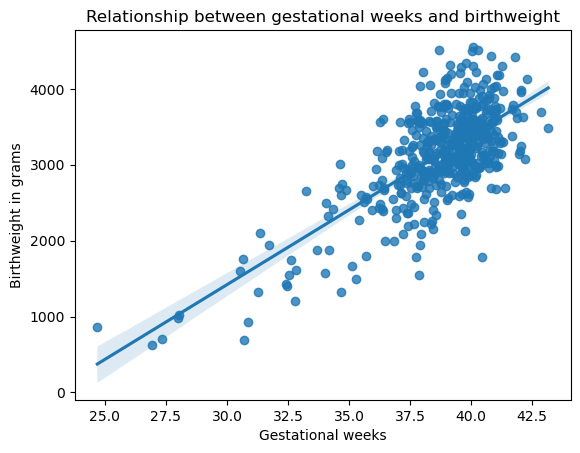

In [45]:
sns.regplot(x=merged_df["gestwks"], y=merged_df["bweight"])
plt.xlabel("Gestational weeks")
plt.ylabel("Birthweight in grams")
plt.title("Relationship between gestational weeks and birthweight")
plt.savefig("Bweightvsgestwks.pdf", format="pdf")
plt.show()




In [46]:
cleaned_merged_df.to_excel("cleaned_merged_dataset.xlsx", index=False)